# Defaulted Prosper Loans
## by Brian Yatich


## Investigation Overview
> The income range of between 25,000-49,000 had the most loan default frequency. Under further scrutiny, it was observed that this was due to the fact that this range of income had the highest interest rate on their loans. I also observed that loan amounts within the range of 0 - 5000 had the highest rate of defaults and this was because this loan range had the highest average interest rates. Also, Loan defaulters with a monthly income range of between 0-10,000 had the highest frequency of defaults. A general decrease in loan defaults was seen with an increase in monthly income

>From the heatmap, the strongest featured correlation in defaulted loans of the Prosper Loan Data set is the relation between monthly payments and the loan amount. The correlation show that with every increase in loan amount, there is a corresponding increae in the monthly payments

## Dataset Overview

> The Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan status, loan amount, borrower rate, borrower income range, among others 

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [58]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [59]:
# Make a copy of the data set 
loan = loan_data.copy()

In [60]:
#This keeps only the rows with defaulted loans
loan = loan[loan["LoanStatus"].str.contains("Defaulted")]
loan.shape

(5018, 81)

In [61]:
loan.rename(columns = {'ListingCategory (numeric)':'loan_purpose'}, inplace = True)

# Convert the Listing Category column to string data format
loan['loan_purpose'] = loan['loan_purpose'].astype(str)
print(loan['loan_purpose'].dtype)

object


In [62]:
# Replace the Listing Category numbers with their actual string values
loan['loan_purpose'] = loan['loan_purpose'].replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                                                           '11', '12', '13', '14', '15', '16', '17', '18', '19', '20' ], 
                                                          ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business',
                                                           'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat',
                                                           'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',
                                                           'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
                                                           'Wedding Loans'])

In [63]:
# print out the index order of loan_purpose  based on value counts

list_category = loan['loan_purpose'].value_counts().index
print(list_category)

Index(['Not Available', 'Debt Consolidation', 'Business', 'Other',
       'Personal Loan', 'Home Improvement', 'Auto', 'Student Use',
       'Household Expenses', 'Medical/Dental', 'Taxes', 'Vacation',
       'Wedding Loans', 'Large Purchases', 'Motorcycle', 'Cosmetic Procedure',
       'RV', 'Green Loans'],
      dtype='object')


In [64]:
#print out the index order of IncomeRange based on value count

income_index = loan['IncomeRange'].value_counts().index
print(income_index)

Index(['Not displayed', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
       '$1-24,999', '$100,000+', '$0', 'Not employed'],
      dtype='object')


In [65]:
#Create a new BorrowYear column

loan['BorrowYear'] = loan['LoanOriginationQuarter'].str[3:]

In [66]:
#Iterate through the columns to order them categorically

ordinal_var_dict = {'loan_purpose' : ['Debt Consolidation', 'Business', 'Other', 'Personal Loan',
                                      'Home Improvement', 'Auto', 'Student Use','Household Expenses',
                                      'Medical/Dental', 'Taxes', 'Vacation','Wedding Loans',
                                      'Large Purchases', 'Motorcycle', 'Cosmetic Procedure','RV', 'Green Loans'],
                    
                    'BorrowYear' : ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                    'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+'],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], 
                   'ProsperScore': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [67]:
#Create ranges of the monthly income data

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
bucket_l = ['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000+']
loan['MonthlyIncome_Range'] = pd.cut(loan['StatedMonthlyIncome'], bins, labels=bucket_l)

In [68]:
# Pick a color from seaborn's color palette
base_color = sb.color_palette()[0]

In [69]:
# Define a function for count plots

def UniCountY(y, figsize, ylabel):
    plt.figure(figsize=figsize)
    sb.countplot(data = loan, y=y, color = base_color)
    plt.title("Countplot for "+ylabel)
    plt.xlabel('Count', fontsize=16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.show()
    

## Distribution of loan default counts with respect to annual income range
The income range of between 25,000-49,000 had the most loan default frequency. Under further scrutiny, it was observed that this was due to the fact that this range of income had the highest interest rate on their loans.


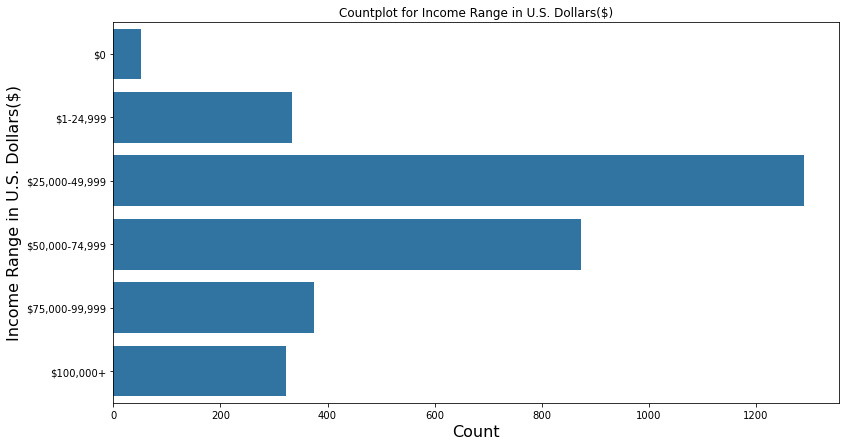

In [70]:
# Plot a countplot for Income Range
UniCountY('IncomeRange', (13, 7), 'Income Range in U.S. Dollars($)')

In [71]:
#Define a function for Box Plots

def BoxPlot(x, y, xlabel, ylabel):
    plt.figure(figsize=(15,7))
    sb.boxplot(x=x, y=y, data=loan, color = base_color)
    plt.title("Box plot between "+xlabel+" and "+ylabel)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

## Interest Rate vs Income Range
 Under further scrutiny, it was observed that this was due to the fact that this range of income had the highest interest rate on their loans as shown by the boxplot in the next slide

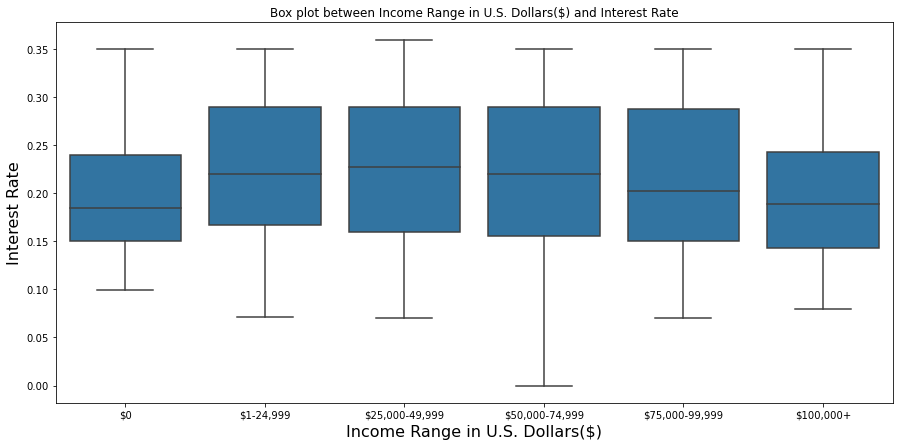

In [72]:
# Plot a box plot for interest rate against income range

BoxPlot('IncomeRange', 'BorrowerRate', 'Income Range in U.S. Dollars($)', 'Interest Rate' )

## Distribution of loan defaults with respect to monthly income range

Loan defaulters with a monthly income range of between $0-10,000 had the highest frequency of defaults. A general decrease in loan defaults was seen with an increase in monthly income. The distribution is shown in the next slide.

In [73]:
# Define a function for countplot

def UniCount(x, figsize, xlabel):
    plt.figure(figsize=figsize)
    sb.countplot(data = loan, x=x, color = base_color)
    plt.title("Countplot for "+xlabel)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel('Count', fontsize = 16)
    plt.show()

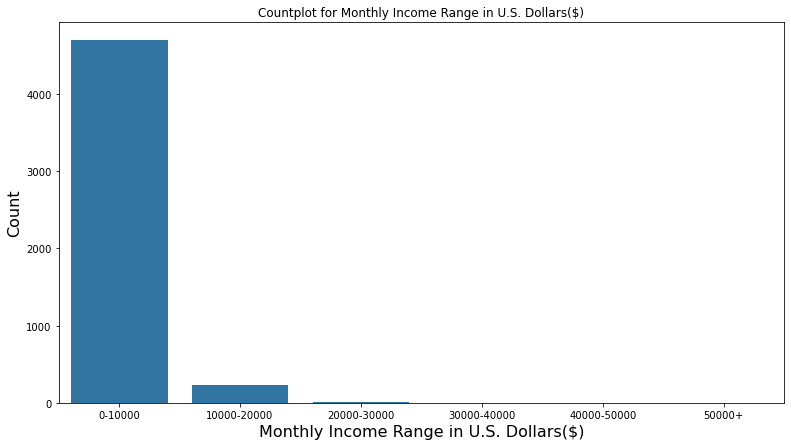

In [74]:
# Plot a countplot for Monthly income range

UniCount('MonthlyIncome_Range', (13, 7), 'Monthly Income Range in U.S. Dollars($)')

## Interest Rate vs Monthly Income Range

Loanees who defaulted on loans with a steady monthly income of between $0 - 10,000 also had the highest interest rate on their loans compared to the other , monthly income ranges. A decrease in loan interest rates is also observed with an increase in monthly income range

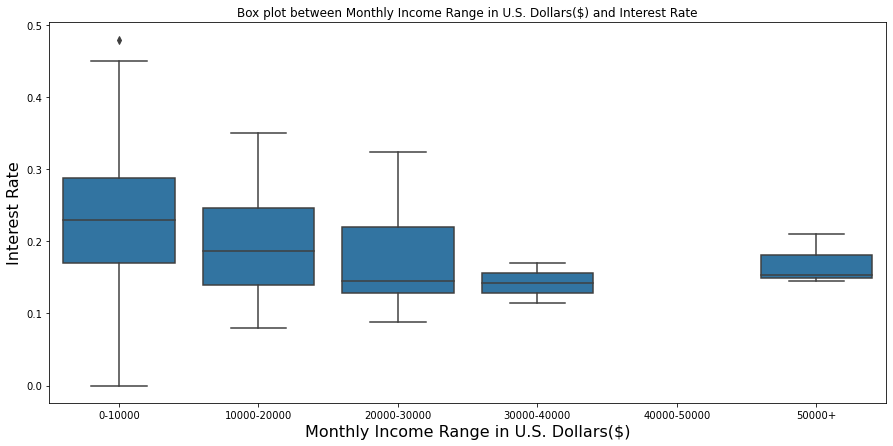

In [75]:
# Create a boxplot for interest rate against monthly income range

BoxPlot('MonthlyIncome_Range', 'BorrowerRate', 'Monthly Income Range in U.S. Dollars($)', 'Interest Rate')

## Heatmap Correlation

The strongest featured correlation in defaulted loans of the Prosper Loan Data set is the relation between Monthly payments and the loan amounts

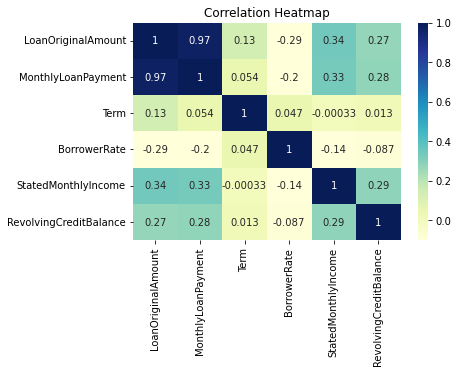

In [76]:
#Plot a heatmap to show various correlations

continuous_f = ["LoanOriginalAmount", "MonthlyLoanPayment", 
                "Term", "BorrowerRate", "StatedMonthlyIncome",
                "RevolvingCreditBalance",]
loan_corr = loan[continuous_f].corr()
sb.heatmap(loan_corr,vmin=-0.1,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

## Monthly loan payment vs Loan amount

This is the strongest correlation of the factors that I considered in this loan analysis activity. It show that an increase in loan amounts defaulted resulted in an increase in the monthly payments

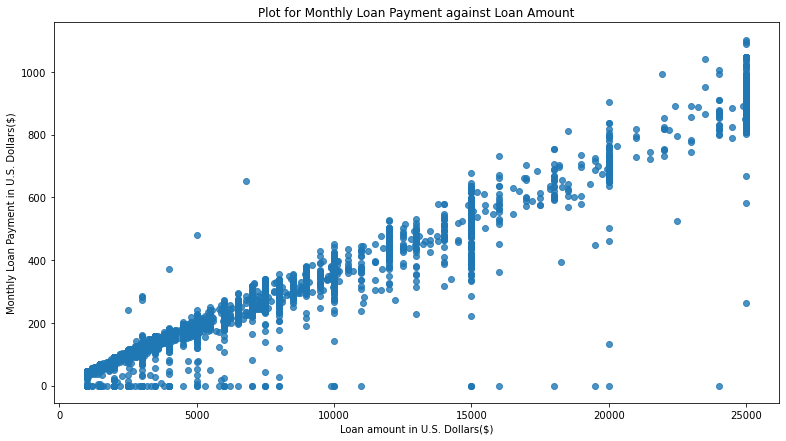

In [77]:
# Plot a regplot of monthly loan payment against loan amount

plt.figure(figsize = (13, 7))
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', fit_reg = False)
plt.title('Plot for Monthly Loan Payment against Loan Amount')
plt.ylabel('Monthly Loan Payment in U.S. Dollars($)')
plt.xlabel('Loan amount in U.S. Dollars($)');